<a href="https://colab.research.google.com/github/JulianaRamos2021/Clusterizando-base-de-dados/blob/main/Clusterizando_clientes_de_e_comerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clusterização de clientes
# Dataset extraído do Kagle: https://www.kaggle.com/datasets/prachi13/customer-analytics

Importando bibliotecas


# **ENTENDENDO DADOS DAS COLUNAS**

1.   **ID** = Número de identificação do cliente.
2.   **Warehouse_block**= A empresa tem um grande armazém que é dividido em blocos como A, B, C, D, E.
3.   **Mode_of_Shipment** = A Empresa Envia os produtos de várias maneiras, como Navio, Voo e Rodoviário. 
4. **Customer_care_calls** = O número de chamadas feitas a partir de consulta para consulta da remessa.
5. **Customer_rating** = A empresa tem avaliação de cada cliente, 1 é o mais baixo (Pior), 5 é o mais alto (Melhor)
6. **Cost_of_the_Product** =  Custo do Produto em dólares americanos.
7. **Prior_purchases** = O Número de Compra Prévia.
8. **Product_importanceA**  = Empresa categorizou o produto em vários parâmetros, como baixo, médio, alto.
9. **Gender** = Masculino e feminino.
10. **Discount_offered**  = Desconto oferecido naquele produto específico.
11. **Weight_in_gms** = Peso_em_gms
12. **Reached.on.Time_Y.N** =  Desconsiderar




In [ ]:
#Importando bibliotecas necessárias para análise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Importando arquivo
from google.colab import files
import io

uploaded  = files.upload()
file_name = next(iter(uploaded))
file_name

Saving Train.csv to Train (1).csv


'Train.csv'

In [ ]:
#Ajustando arquivo
gfile_name = io.StringIO(uploaded[file_name].decode('ISO 8859-1').strip())
df = pd.read_csv(gfile_name)
df

,ï»¿ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
#Verificando distribuição de gênero da base de dados
df.Gender.value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [ ]:
#Verificando porcentagem de cada gênero
df.Gender.value_counts() / df.shape[0]

F    0.504137
M    0.495863
Name: Gender, dtype: float64

In [ ]:
#Verificando modo de transporte (barco, avião e estrada)
df.Mode_of_Shipment.value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [ ]:
#Transformando as variáveis categóricas em binárias com dummy :). 
df_d = pd.get_dummies(df)
df_d

,ï»¿ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,177,3,44,1233,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,2,4,5,216,2,59,3088,1,0,0,...,0,1,1,0,0,0,1,0,0,1
2,3,2,2,183,4,48,3374,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,4,3,3,176,4,10,1177,1,0,1,...,0,0,1,0,0,0,0,1,0,1
4,5,2,2,184,3,46,2484,1,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,1538,1,1,0,...,0,0,0,0,1,0,0,1,1,0
10995,10996,4,1,232,5,6,1247,0,0,1,...,0,0,0,0,1,0,0,1,1,0
10996,10997,5,4,242,5,4,1155,0,0,0,...,0,0,0,0,1,0,1,0,1,0
10997,10998,5,2,223,6,2,1210,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [ ]:
#Aplicando medida de similaridade Cosseno. O calculo define quais variáveis estão em um angulo mais próximo as demais. Aqui estou somando o valor total
# de cada linha e dividindo por cada célula, com isso o valor final de cada linha será igual a um. 
X = df_d.div( df_d.sum(axis=1), axis='rows')
X

,ï»¿ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0.000681,0.002723,0.001361,0.120490,0.002042,0.029952,0.839346,0.000681,0.000000,0.000000,...,0.000681,0.000000,0.000681,0.0,0.000000,0.0,0.000681,0.000000,0.000681,0.000000
1,0.000592,0.001183,0.001479,0.063886,0.000592,0.017450,0.913339,0.000296,0.000000,0.000000,...,0.000000,0.000296,0.000296,0.0,0.000000,0.0,0.000296,0.000000,0.000000,0.000296
2,0.000829,0.000552,0.000552,0.050539,0.001105,0.013256,0.931787,0.000276,0.000276,0.000000,...,0.000000,0.000000,0.000276,0.0,0.000000,0.0,0.000276,0.000000,0.000000,0.000276
3,0.002894,0.002171,0.002171,0.127352,0.002894,0.007236,0.851664,0.000724,0.000000,0.000724,...,0.000000,0.000000,0.000724,0.0,0.000000,0.0,0.000000,0.000724,0.000000,0.000724
4,0.001831,0.000732,0.000732,0.067375,0.001098,0.016844,0.909557,0.000366,0.000000,0.000000,...,0.000000,0.000000,0.000366,0.0,0.000000,0.0,0.000000,0.000366,0.000366,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0.858917,0.000312,0.000078,0.019686,0.000391,0.000078,0.120147,0.000078,0.000078,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000078,0.0,0.000000,0.000078,0.000078,0.000000
10995,0.880032,0.000320,0.000080,0.018567,0.000400,0.000480,0.099800,0.000000,0.000000,0.000080,...,0.000000,0.000000,0.000000,0.0,0.000080,0.0,0.000000,0.000080,0.000080,0.000000
10996,0.885712,0.000403,0.000322,0.019491,0.000403,0.000322,0.093025,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000081,0.0,0.000081,0.000000,0.000081,0.000000
10997,0.883373,0.000402,0.000161,0.017912,0.000482,0.000161,0.097189,0.000000,0.000000,0.000000,...,0.000000,0.000080,0.000000,0.0,0.000080,0.0,0.000000,0.000080,0.000000,0.000080


In [ ]:
#Definindo o número de clusters. Os clusters são os grupos definidos na conclusão da análise, se não localizar o número ideal podemos forçar os dados a se 
#encaixarem em um grupo inadequado. 

#número de vezes que fará a clusterização: n_init=100,
#max_iter=10_000 = máximo de passos para pegar o melhor resultado.
#intertia_ = distancia média entre os clusters.

distortions = []
n_clusters = range(2,15)
for n_clus in n_clusters:
  print(n_clus)
  distortions.append( KMeans(n_clusters=n_clus,max_iter=10_000,n_init=100, random_state=61658). fit(X). inertia_ )

  



2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
distortions

[279.6371448025061,
 146.37575780734682,
 63.931055500083716,
 42.37273973632202,
 31.20391819553945,
 24.02628974014108,
 20.16623026373871,
 16.629753191059827,
 14.24723439253728,
 12.15127889374396,
 10.692031535223412,
 9.653427569884535,
 8.709720739159373]

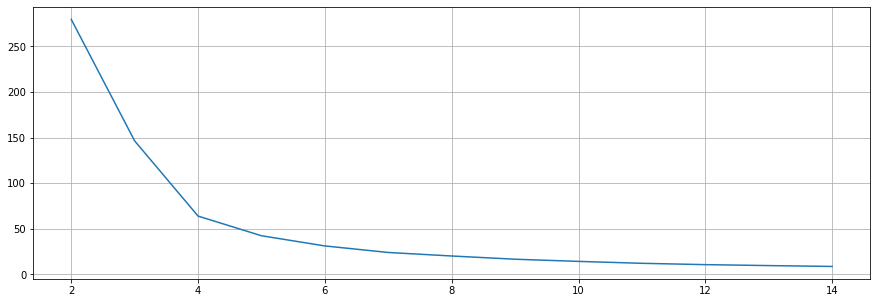

In [ ]:
#Aplicando Elbow Method (gráfico de cotovelo) para definir o número de clusters ideal. O ponto mais acentuado da curva define o momento em que o número
#de divisões dentro dos dados passa a reduzir, assim definimos que o número ideal de clusters é 4.
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

In [ ]:
#Adiciono o número de clusters
km = KMeans(n_clusters=4,max_iter=10_000,n_init=100, random_state=61658)
X_t = km.fit_predict(X)
X_t

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
#Agora que identificamos o cluster de cada linha de cliente retornei para a base de dados original adicionando o número do cluster de cada cliente.
df.loc[:,'clus'] = X_t
df

,ï»¿ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,clus
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,2
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,2
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,2
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,2
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,1
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,1
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,1


In [ ]:
#O agrupamento está pronto, já posso listar os clientes de cada cluster. Aqui estou visualizando somente clientes do cluster 1.
df.loc[df.clus==1]

,ï»¿ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,clus
2908,2909,C,Ship,3,4,154,2,low,M,29,1016,1,1
2934,2935,D,Ship,4,3,135,3,low,F,15,1008,1,1
2996,2997,A,Road,3,1,132,4,medium,M,58,1067,1,1
3011,3012,F,Flight,4,5,157,4,medium,F,12,1038,1,1
3015,3016,B,Flight,3,1,104,2,low,M,1,1021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,1
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,1
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,1
